# Sensitivity Analysis for Imaging Modalities

## What is Sensitivity?

Sensitivity measures how good a test is at finding problems that actually exist. It answers the question: "When there really is a parathyroid gland to find, how often does the scan actually find it?"

Think of it like this: if 100 patients have parathyroid disease, sensitivity tells us how many of those 100 the scan will successfully detect.

## How We Calculate Sensitivity

Sensitivity is calculated using this formula:
```
Sensitivity = (Correctly Found Cases) / (All Cases with Disease) × 100
```

For our study:
- **Correctly Found Cases (True Positives)**: Scans that successfully located the parathyroid gland
- **Missed Cases (False Negatives)**: Scans that were "Non-localizing" but surgery found disease
- **All Cases with Disease**: Both found and missed cases combined

## What We Include and Exclude

We include all patients who had surgery (meaning they had confirmed disease):
- **True Positives**: Scans that found the gland in the right place
- **False Negatives**: Scans that said "Non-localizing" but surgery found disease anyway

We exclude cases where no scan was done (NaN/missing data) because we can't measure what wasn't tested.

## Why Sensitivity Matters

High sensitivity (close to 100%) means the scan rarely misses disease. If a scan has 90% sensitivity, it will find 9 out of 10 cases of parathyroid disease. This helps doctors know which scans are best for initial screening and detection.


Import

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

Read Data

In [2]:
preop_imaging_df = pd.read_excel('Data/final_clean_imaging_data.xlsx')

## Function that calculates the sensitivity for each respective imaging modality** 

### Parameters
- **df**: the dataframe with imaging and concordance data  
- **modality_name**: the name of the scan column (e.g. `'4D CT Scan'`)

### Returns
- **sensitivity**: true positives / (true positives + false negatives)  
- **true_positives**: scans that matched surgery (exact or side)  
- **false_negatives**: scans that were non-localizing but surgery found disease



In [3]:
def calculate_sensitivity(df, modality_name):
    
    # initialize the concordance columns
    concordance_col = f"{modality_name} Calculated Concordance"
    
    # define true positives as exact or side matches 
    localized_results = df[df[concordance_col].isin(['Yes (Exact)', 'Yes (Side)'])]
    
    # define false negatives as non-localizing scan but sugery found disease 
    nonlocalized_results = df[df[modality_name] == 'Non-localizing']
    
    # calculate the total true positives and false negatives 
    true_positives = len(localized_results)
    false_negatives = len(nonlocalized_results)
    
    # avoid dividing by 0 
    if true_positives + false_negatives == 0:
        return None, 0, 0
    
    # define and calculate sensitivity 
    sensitivity = true_positives / (true_positives + false_negatives)
    return sensitivity, true_positives, false_negatives

### Function Test

In [4]:
# Test the function to make sure it works 
sensitivity, true_positives, false_negatives = calculate_sensitivity(preop_imaging_df, '4D CT Scan')
print(f"4D CT Scan Sensitivity: {sensitivity:.2%} ({true_positives} TP / {true_positives + false_negatives} total)")


4D CT Scan Sensitivity: 71.20% (136 TP / 191 total)


## Sensitivity Analysis Results
Calculate and display the Sensitivity for each imaging modality

In [5]:
# define the list of modalities 
modalities = ['SPECT/CT', '4D CT Scan', 'Ultrasound', 'Sestamibi']

# initialize a list to store the results 
results = []

# iterate through each individual modality 
for modality in modalities:
   
    # call the sensitivity function 
    sensitivity, true_positives, false_negatives = calculate_sensitivity(preop_imaging_df, modality)
    
    # make sure it isn't null
    if sensitivity is not None:
        
        # append each result to its respective modality
         results.append({
            'Modality': modality,
            # round the sensitivity
            'Sensitivity': round(sensitivity, 4),  
            'True Positives': true_positives,
            'False Negatives': false_negatives,
            'Total with Disease': true_positives + false_negatives
        })

In [6]:
# Convert the list of dicts to a DataFrame
sensitivity_df = pd.DataFrame(results)

In [7]:
sensitivity_df

,Modality,Sensitivity,True Positives,False Negatives,Total with Disease
0,SPECT/CT,0.7476,154,52,206
1,4D CT Scan,0.7120,136,55,191
2,Ultrasound,0.5074,69,67,136
3,Sestamibi,0.6391,108,61,169


## Making the Results Look Better

We cleaned up the data so it's easier to understand:
- Change the sensitivity numbers from decimals like 0.85 to percentages like 85%
- Round everything to 2 decimal places so it's not messy
- Put the columns in a better order with the most important stuff first


In [8]:
# create a new column that formats the sensitivity as a percentage 
sensitivity_df['Sensitivity (%)'] = (sensitivity_df['Sensitivity'] * 100).round(2)

# move that column to the front
sensitivity_df = sensitivity_df[['Modality', 'Sensitivity (%)', 'True Positives', 'False Negatives', 'Total with Disease']]

## Sensitivity Comparison Chart


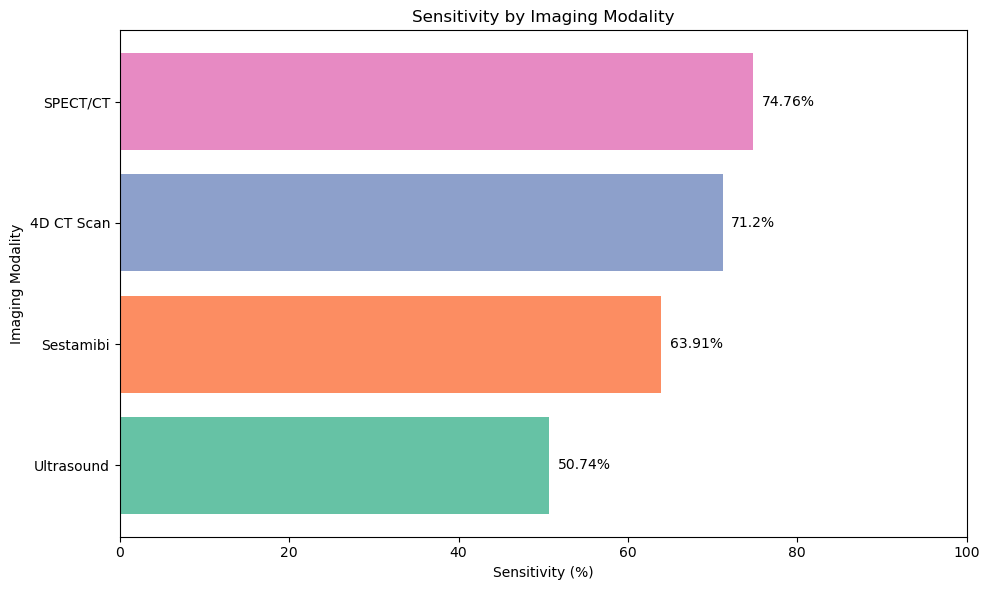

In [9]:
# Sort by sensitivity (highest to lowest)
sorted_data = sensitivity_df.sort_values('Sensitivity (%)', ascending=True) 

plt.figure(figsize=(10, 6))
colors = ['#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854']
bars = plt.barh(sorted_data['Modality'], sorted_data['Sensitivity (%)'], color=colors)

# Add percentage labels on the bars
for i, v in enumerate(sorted_data['Sensitivity (%)']):
    plt.text(v + 1, i, f'{v}%', va='center', fontsize=10)

plt.title('Sensitivity by Imaging Modality')
plt.xlabel('Sensitivity (%)')
plt.ylabel('Imaging Modality')
plt.xlim(0, 100)  
plt.tight_layout()
plt.show()
